In [1]:
import pandas as pd
import numpy as np
from scipy.stats import entropy
import matplotlib.pyplot as plt

In [2]:
PARQUET_FILE_PATH = "2_after_feature_extraction/feature_matrix_media_calc.parquet"

### Functions

#### Shannon entropy of a series (normalized to [0, 1])

In [3]:
def normalized_entropy(series):
    counts = series.value_counts(normalize=True, dropna=False)
    H = entropy(counts, base=2)
    H_max = np.log2(len(counts)) if len(counts) > 1 else 1
    return H / H_max if H_max > 0 else 0

#### Debugging function

In [4]:
def debug_entropy(feature_name):
    series = df[feature_name]
    print(f"{feature_name}:")
    print(f"- Unique values: {series.nunique()} out of {len(df)} rows")
    print(f"- Most common:\n{series.value_counts().head(5)}")
    print(f"- Entropy: {normalized_entropy(series):.4f}")

### Execution

In [5]:
df = pd.read_parquet(PARQUET_FILE_PATH)

In [6]:
# remove columns without css: in them
df = df[df.columns[df.columns.str.contains('css:')]]

In [7]:
# calculate entropy
feature_entropies = {}

for col in df.columns:
    if col == 'session_id':
        continue
    feature_entropies[col] = normalized_entropy(df[col])

entropy_df = pd.DataFrame.from_dict(feature_entropies, orient='index', columns=['entropy'])
entropy_df = entropy_df.sort_values(by='entropy', ascending=False)

<Figure size 1200x600 with 0 Axes>

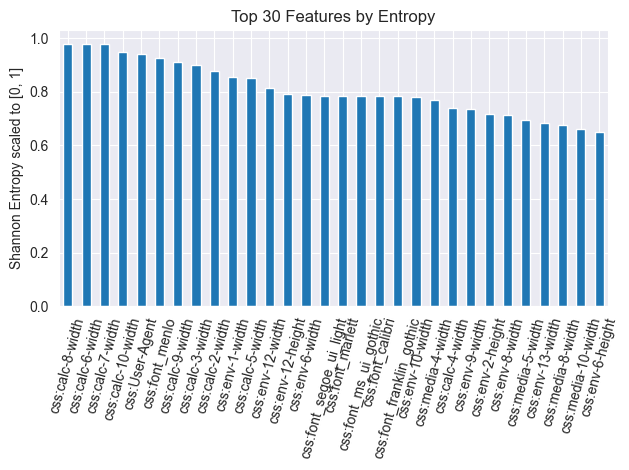

In [8]:
# plotting
plt.figure(figsize=(12, 6))
entropy_df.head(30).plot(kind='bar', legend=False)
plt.title('Top 30 Features by Entropy')
plt.ylabel('Shannon Entropy scaled to [0, 1]')
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()

<Figure size 2000x600 with 0 Axes>

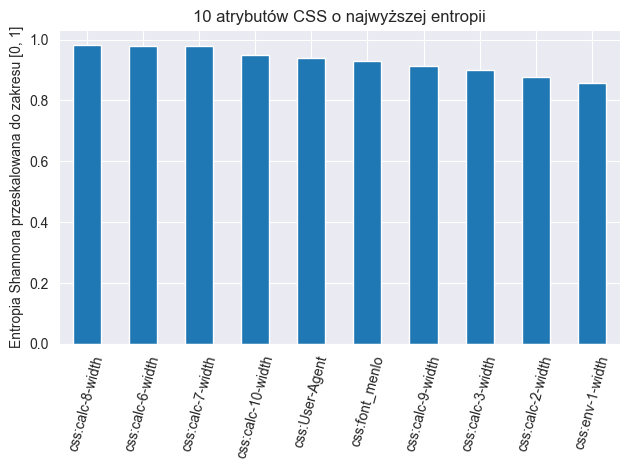

In [9]:
# Filter for columns containing "css"
css_entropy_df = entropy_df[entropy_df.index.str.contains('css')]

# remove user agent from the mix
# css_entropy_df = css_entropy_df[~css_entropy_df.index.str.contains('User-Agent')]

# Plotting
plt.figure(figsize=(20, 6))
css_entropy_df.head(10).plot(kind='bar', legend=False)
plt.title('10 atrybutów CSS o najwyższej entropii')
plt.ylabel('Entropia Shannona przeskalowana do zakresu [0, 1]')
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()

In [18]:
# add column with number of unique values
css_entropy_df['n_unique'] = css_entropy_df.index.map(lambda x: df[x].nunique())
css_entropy_df.head(30)

,entropy,n_unique
css:calc-8-width,0.980833,3
css:calc-6-width,0.977449,4
css:calc-7-width,0.977449,4
css:calc-10-width,0.950033,5
css:User-Agent,0.939978,336
css:font_menlo,0.928425,2
css:calc-9-width,0.912797,5
css:calc-3-width,0.900880,6
css:calc-2-width,0.877344,6
css:env-1-width,0.856628,5


In [10]:
col = 'css:calc-8-width'
n_unique = df[col].nunique()
print(f"{col} has {n_unique} unique values out of {len(df)} rows")

css:calc-8-width has 3 unique values out of 922 rows


<Axes: title={'center': 'Top values for css:calc-8-width'}, xlabel='css:calc-8-width'>

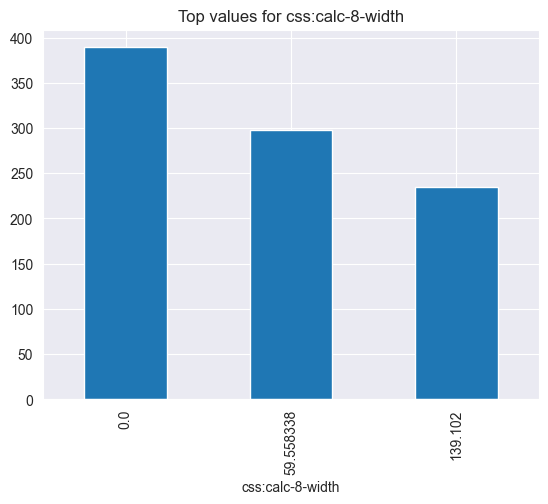

In [11]:
df[col].value_counts().head(20).plot(kind='bar', title=f"Top values for {col}")

In [12]:
# Summary statistics
print("Average feature entropy:", entropy_df['entropy'].mean())
print("Highest entropy feature:", entropy_df.idxmax()[0])
print("Lowest entropy feature:", entropy_df.idxmin()[0])

Average feature entropy: 0.5760618158964236
Highest entropy feature: css:calc-8-width
Lowest entropy feature: css:env-5-height


C:\Users\Filip\AppData\Local\Temp\ipykernel_28984\474493234.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Highest entropy feature:", entropy_df.idxmax()[0])
C:\Users\Filip\AppData\Local\Temp\ipykernel_28984\474493234.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Lowest entropy feature:", entropy_df.idxmin()[0])


In [13]:
debug_entropy(col)

css:calc-8-width:
- Unique values: 3 out of 922 rows
- Most common:
css:calc-8-width
0.000000      389
59.558338     298
139.102000    235
Name: count, dtype: int64
- Entropy: 0.9808


In [14]:
# todo pomysł że można zrobić porównanie entropii elementów zebranych za pomocą CSS do jsa etc.